In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Objective

The objctive of this project is to visually analyze the Iris species with Python packages, and to use Logistic Regression and K-Neighbours to build a machine learning (ML) model to correctly predict the tye pfo Iris species, based on the data given in the "Iris.csv" file.

# Initial Analysis

To better understand the csv file, ".head()" is used to read the first few rows of data in the .csv file. From it, it appears that there are only 6 columns, with 4 being numerical values, 1 being the Id, and 1 being the Species (Categorical). It will ahve to be converted into numerical later on.

In [2]:
iris_data = pd.read_csv("Iris.csv")
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Countplot Analysis

To better understand the labels given, it is best to inspect the distribution of the different types of species. Hence, I used a countplot to visualize the distribution. It seems that they are equally distributed, indicating that the labels are not skewed to a single label.

c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


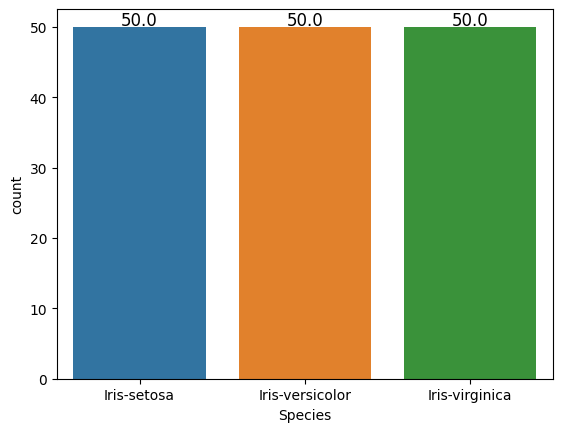

In [3]:
ax = sns.countplot(x='Species', data=iris_data)

# Calculate and add text labels for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

# Heat map Analysis
Next, a heat map is used to determine if there are any incomplete data in any of the columsn . This might cause the model to be inaccurate later on. Since there are no anomalies observed in the heat map, the .csv file has complete data. This means that there is no need for imputatation to fill up any mising data.

<Axes: >

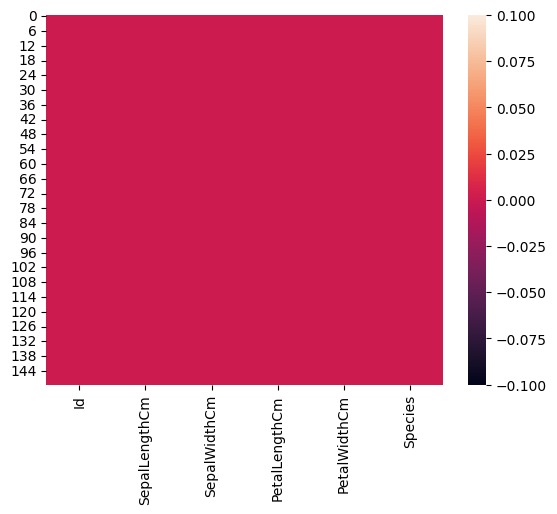

In [4]:
sns.heatmap(iris_data.isna())

# Transforming the Categorical data, Speciies

Since "Species" column will be used as the lael, it cannot be omitted out and hence has to be transformed into a numerical values. If not, K-Nieghbours and Logistic Regression will not work properly. "LabelEncode" function is used to do so, whereby it will transform all of the categorical labels into numerical labels within the same column. 

There is another comonly used encoder called the One-Hot Encoder, where it creates binary columns for each category and assigns a 1 or 0 to indicate thepresence or absence of the category.

Due to the nature of the objective, the Label Encoder will be used instead.


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Correlation Analysis

A heatmap indicating the correlation between all of the columns is used to determine the usefulness of each column. If a feautre has litle correlation (<0.1, personally), then it can be removed from the model since it would only increase computation and may cause overfiting.

It would seem that SepalWidthcm has the least correlation amongst the rest of the features. However, it is still high enough to implement it into the ML model. 

At first, it would seem that "Id" is correlated to the Species label. However, upon closer inspection, that is only the case due to the ordering of the Species within the csv file. If it were randomize, it will not be correlated to Species anymore.

## Visualisation between each feature
It would seem that each feature is deeply correlated to one another. Let's plot them all against one another to better understand their relationship.

<Axes: >

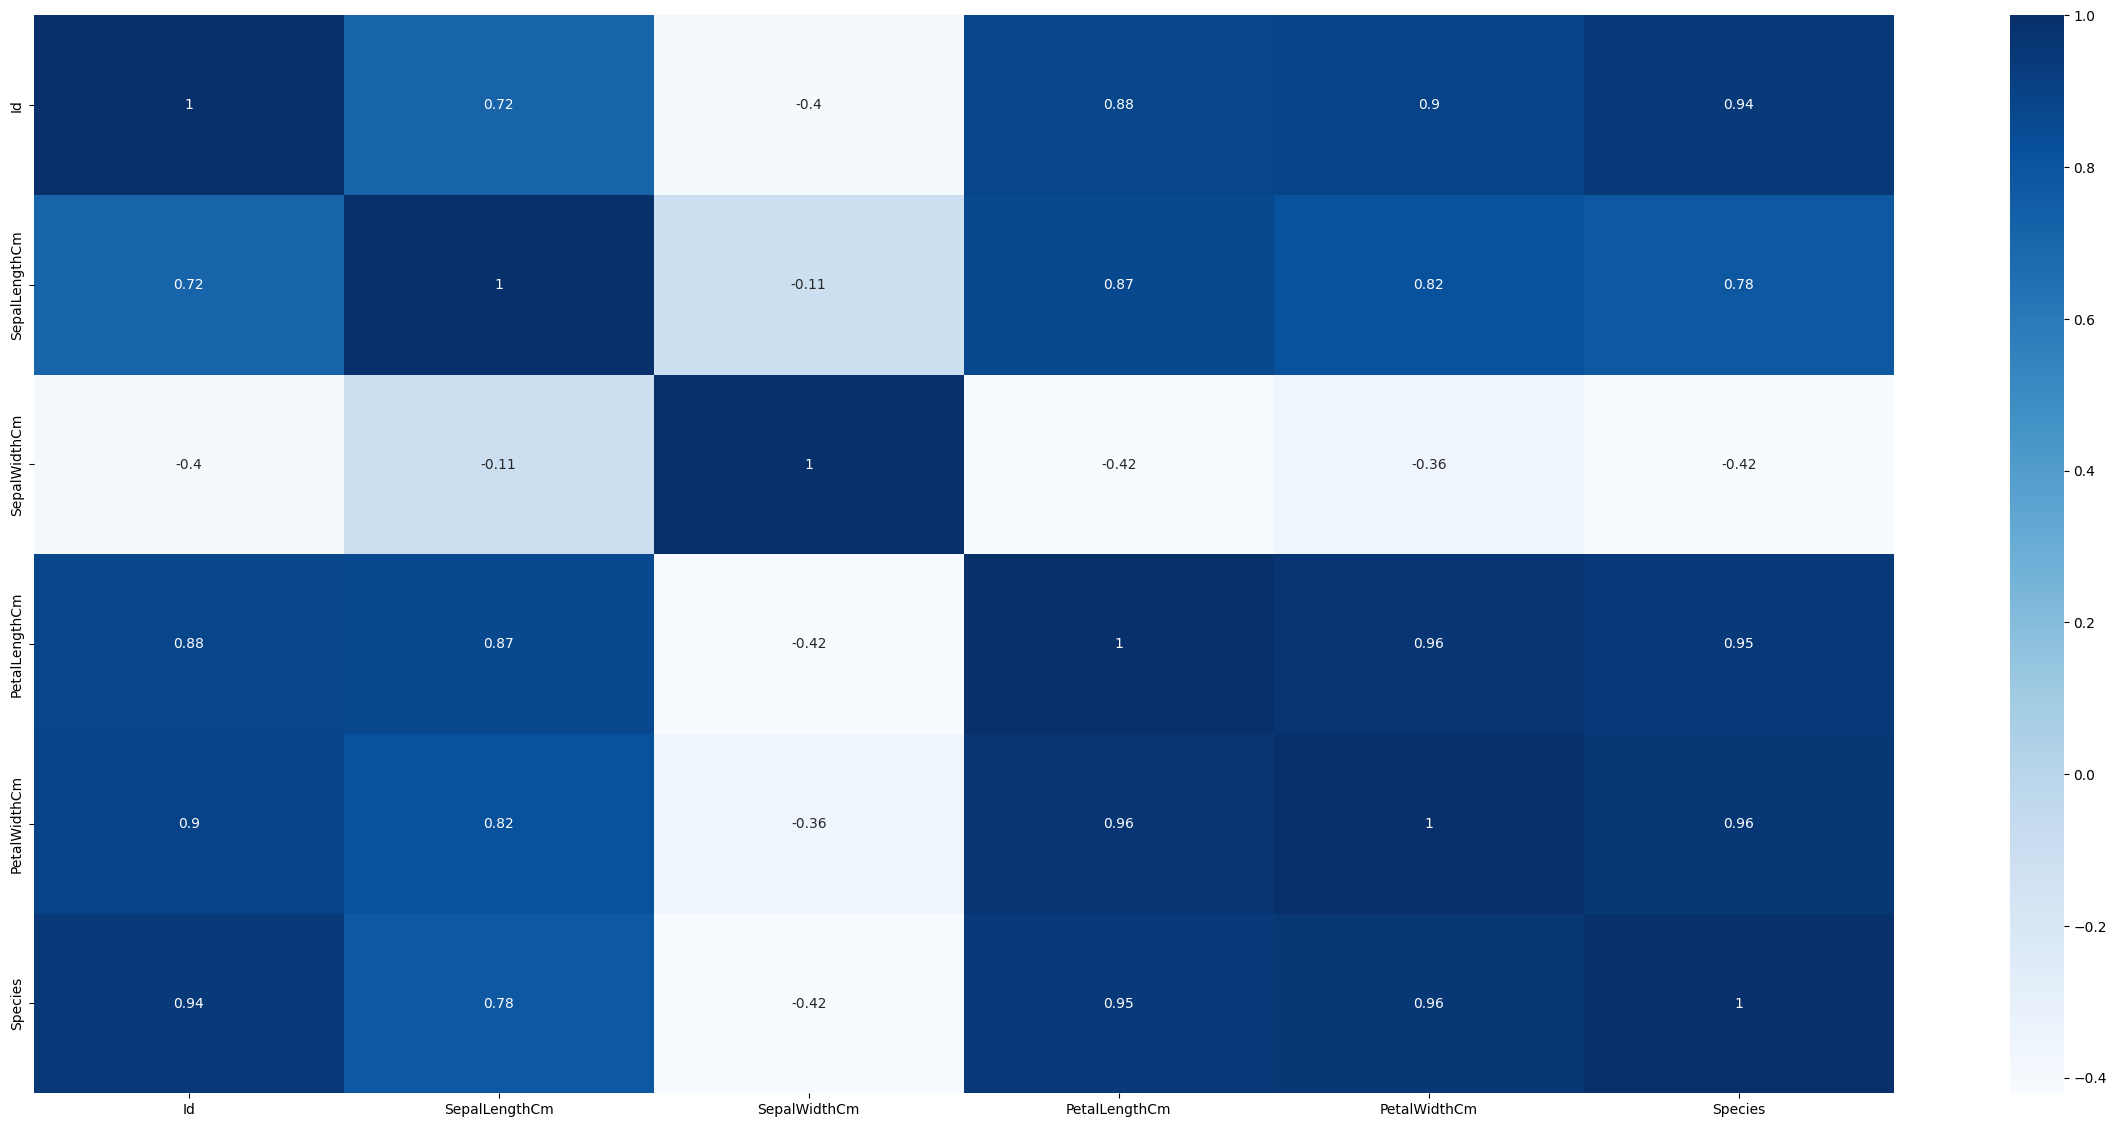

In [6]:
plt.figure(figsize=(30,14))
sns.heatmap(iris_data.corr(), annot=True, cmap='Blues')


## Visualisation between each feature
It would seem that each feature is deeply correlated to one another. Let's plot them all against one another to better understand their relationship.

## Visual Analysis
It appears that most of the features do indeed have a relationship between one another and the species as well. For instance, the PetalWidthcm vs PetalLengthcm shows an obvious pattern amongst the species. This is informative and begs the question, "Can I predict the species based on fewer features?". I will attempt to do so later on in this project. Using fewer features may be beneficial if the accuracy of the model is still high, since it will reduce the computation time significantly.

Conversely, the SpealWidthcm feature tends to show a more "overlapping" plot amongst the species and that could mean that it will not be as effective in helping hte moel to predict the species of Iris. This is importnt to take note as it could mean that it is not necessary to include it in the ML model, and removing it could help to reduce computation time and overfitting to occur.

c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

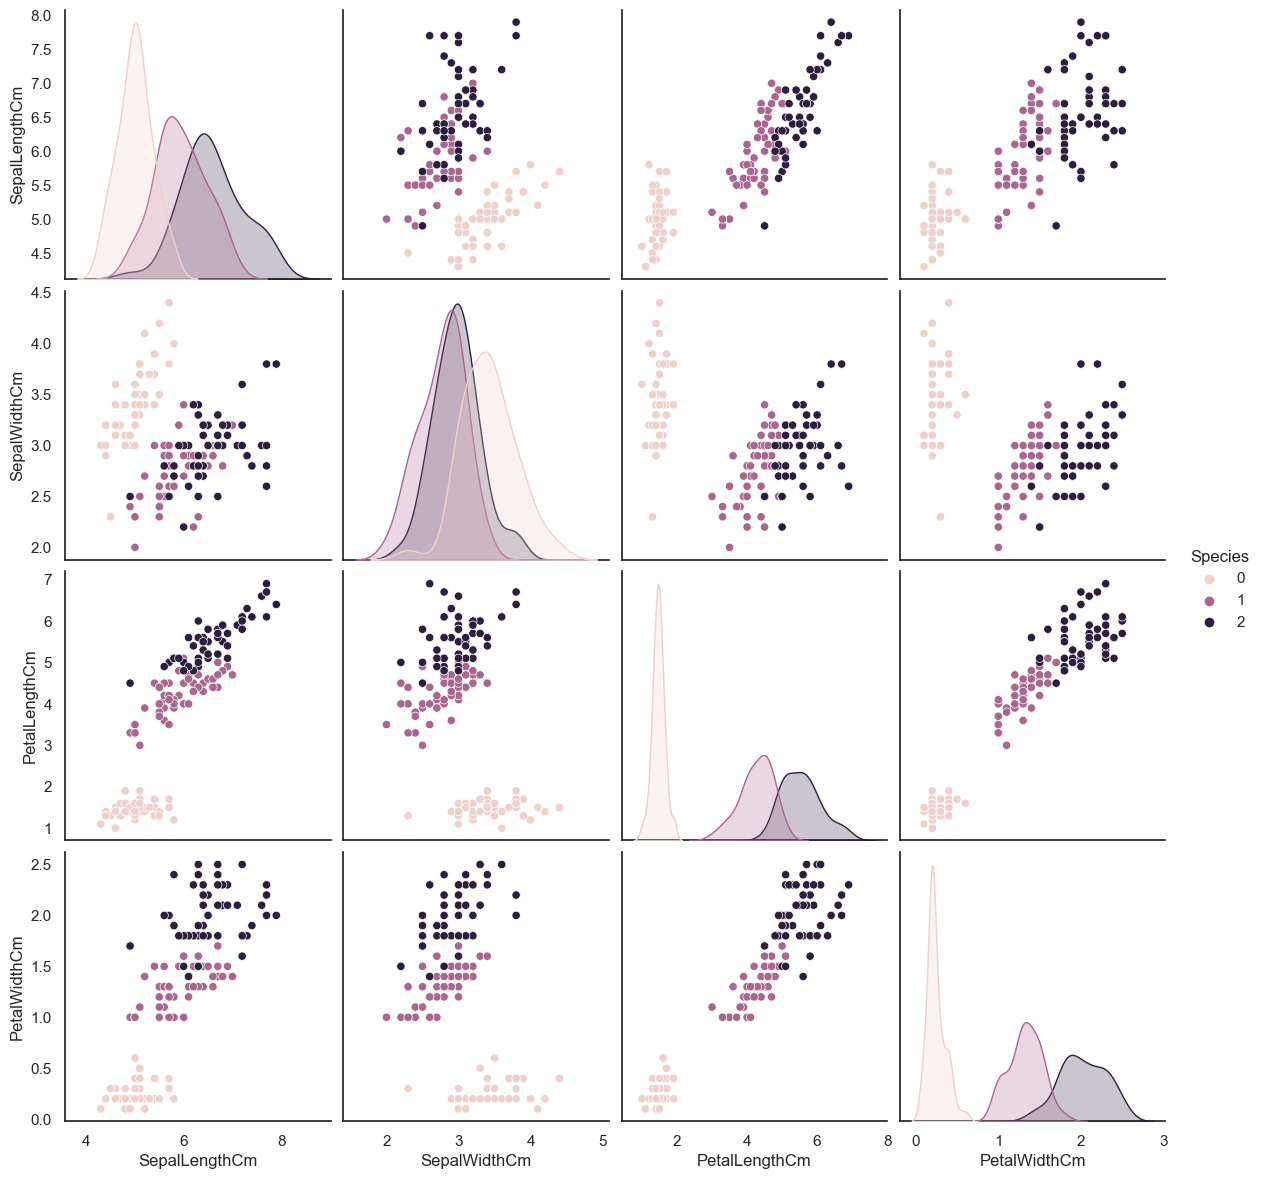

In [7]:


# Modify title appearance
sns.set(style="white")
sns.pairplot(iris_data.drop("Id", axis=1), hue="Species", size=3)


# Final preparations before Modeling
Now that I have a better understanding of the relationships of the data, I will prepare the data by splitting them into testing and training sets to be used by the logistic regression and Kneighbours model. The model that has the highest accuracy will be used. Moreover, I will investigate if utilizing either only the petals or the sepals would produce a more accuracte result as compared to using all of the features.

In [8]:
from sklearn.model_selection import train_test_split

features = iris_data.drop(['Id','Species'],axis=1)
label = iris_data['Species']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)



# Logistic Regresion Modeling (All features)

Logistic Regression will be used, and the precision report will be printed out as well.

# Logistic Regression Analysis
Base on the precision report, the model can be trained to accurately recognize the type of Iris species 100% of the time. However, since there are only 50 daa sets for ecah Iris species, it encoruaged to trian the model with even more data sets first before utilising it. 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

lr = LogisticRegression()

lr.fit(x_train,y_train)
predict = lr.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,0,16


In [10]:
print(classification_report(y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        15
           2      1.000     1.000     1.000        16

    accuracy                          1.000        50
   macro avg      1.000     1.000     1.000        50
weighted avg      1.000     1.000     1.000        50



## K-Nearest Neighbours Modeling( All Features)
K-Neighbours is used here to predict hte type of species found. [USE ELBOW METHOD]
For now, 3 neighbours parameter will be used.

# K-Nearest Neighbours Analysis 
Base on the precision report, it has an F1-accuracy score of 0.980. Looking at the confusion matrix, the model has only made 1 mistaken, where it was not able to identify Species 3 from Species 2. This could be due to the fact that in the Sepal graph, the clusters are not as clearly divided as the petals, thus the K-Nearest Neighbours will be prone to making mistakes. (Not really, since it's only 1, but still good to note). This can be investigated further by omitting the Sepal data before modeling, which will be done below.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(x_train,y_train)
predict=model.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,1,15


In [12]:
print(classification_report(y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.938     1.000     0.968        15
           2      1.000     0.938     0.968        16

    accuracy                          0.980        50
   macro avg      0.979     0.979     0.978        50
weighted avg      0.981     0.980     0.980        50



# Seperating the Petals and Sepal features
The features will now be separated into Petals and Sepal to determine if doing so would actually still allow either ML models to achieve 100% accuracy while still being able to reduce computation time. 


In [63]:
Petal_Data=iris_data[['PetalLengthCm','PetalWidthCm']]
Sepal_Data=iris_data[['SepalLengthCm','SepalWidthCm']]

petal_x_train, petal_x_test, petal_y_train, petal_y_test = train_test_split(Petal_Data, label, test_size=0.33, random_state=42)
sepal_x_train, sepal_x_test, sepal_y_train, sepal_y_test = train_test_split(Sepal_Data, label, test_size=0.33, random_state=42)

sepal_x_train #For verification purposes, I tend to print out a sample of the dataset to determine if there are any errors in them.


,SepalLengthCm,SepalWidthCm
96,5.7,2.9
105,7.6,3.0
66,5.6,3.0
0,5.1,3.5
122,7.7,2.8
...,...,...
71,6.1,2.8
106,4.9,2.5
14,5.8,4.0
92,5.8,2.6


# Logistic Regression (Petal and Sepal Features separated)

Now that the Petal and Sepal features are separated, Logistic Regression and K-Nearest Neighbours will be implemented to them both.

# Logistic Regression Analysis
As observed, it would see mthat using soelyl the Petal features would still train the mode lto have 100% accuracy. However, the Sepal features would not. This could be due to the above mentioend, where the Sepal features are not as clearly separated. In fact, the lack of clear separation has casued the accuracy to decrease significantly, to only  

# Logistic Regression

In [49]:
lr = LogisticRegression()

lr.fit(petal_x_train,petal_y_train)
predict = lr.predict(petal_x_test)
pd.DataFrame(confusion_matrix(petal_y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,0,16


In [50]:
print(classification_report(petal_y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        15
           2      1.000     1.000     1.000        16

    accuracy                          1.000        50
   macro avg      1.000     1.000     1.000        50
weighted avg      1.000     1.000     1.000        50



In [51]:
lr = LogisticRegression()

lr.fit(sepal_x_train,sepal_y_train)
predict = lr.predict(sepal_x_test)
pd.DataFrame(confusion_matrix(sepal_y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,8,7
Class 3,0,2,14


In [52]:
print(classification_report(sepal_y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.800     0.533     0.640        15
           2      0.667     0.875     0.757        16

    accuracy                          0.820        50
   macro avg      0.822     0.803     0.799        50
weighted avg      0.833     0.820     0.814        50



# K-Neighbours

In [59]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(petal_x_train,petal_y_train)
predict=model.predict(petal_x_test)
pd.DataFrame(confusion_matrix(petal_y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,1,15


In [60]:
print(classification_report(petal_y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.938     1.000     0.968        15
           2      1.000     0.938     0.968        16

    accuracy                          0.980        50
   macro avg      0.979     0.979     0.978        50
weighted avg      0.981     0.980     0.980        50



In [61]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(sepal_x_train,sepal_y_train)
predict=model.predict(sepal_x_test)
pd.DataFrame(confusion_matrix(sepal_y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,8,7
Class 3,0,5,11


In [62]:
print(classification_report(sepal_y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.615     0.533     0.571        15
           2      0.611     0.688     0.647        16

    accuracy                          0.760        50
   macro avg      0.742     0.740     0.739        50
weighted avg      0.760     0.760     0.758        50



# Conclusion
(There is something wrong with the model, the models defintiely cannot have a 100% predicition. For now, take it as "very high". check the way the labels have been encoded, I think the problem is there.)


